In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [44]:
data = pd.read_csv("C:/Users/User/Desktop/STQD6024 MLL/ML assignment 4/2022-2023 Football Player Stats.csv", encoding = "latin-1", sep=";")
data

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,17.7,1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,22.0,0,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,78.4,0.36,2.23,0.77,1.45,2.00,4.50,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,8.6,0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,80.8,676.0,188.1,18.5,22.0,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,60.9,1.05,1.51,0.12,1.40,0.93,3.84,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,20.0,1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,91.6,946.3,226.9,29.6,31.8,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,65.4,0.45,1.30,0.35,0.95,1.10,2.60,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,12.9,0,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,87.3,613.6,224.7,17.9,19.4,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,43.4,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,40.5,1.94,1.40,0.23,1.16,1.16,4.96,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4
...,..

In [11]:
data.shape

(2689, 124)

In [12]:
data.dtypes

Rk           int64
Player      object
Nation      object
Pos         object
Squad       object
            ...   
OG         float64
Recov      float64
AerWon     float64
AerLost    float64
AerWon%    float64
Length: 124, dtype: object

In [13]:
# Assuming you have a DataFrame called 'df' with 124 columns
pd.set_option('display.max_columns', None)  # Set max_columns option to None to show all columns
data.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,17.7,1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,22.0,0,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,78.4,0.36,2.23,0.77,1.45,2.00,4.50,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,8.6,0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,80.8,676.0,188.1,18.5,22.0,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,60.9,1.05,1.51,0.12,1.40,0.93,3.84,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,20.0,1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,91.6,946.3,226.9,29.6,31.8,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,65.4,0.45,1.30,0.35,0.95,1.10,2.60,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,12.9,0,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,87.3,613.6,224.7,17.9,19.4,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,43.4,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,40.5,1.94,1.40,0.23,1.16,1.16,4.96,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


In [14]:
data["Pos"].unique()

array(['MFFW', 'DF', 'MF', 'FWMF', 'FW', 'DFFW', 'MFDF', 'GK', 'DFMF',
       'FWDF'], dtype=object)

choose a certain position in "Pos", then do clustering.. select variables that are suitable when performing clustering

In [16]:


# Step 1: Load and Preprocess the Data
#data = pd.read_csv("2022-2023 Football Player Stats.csv")

# objective : to cluster the offensive performance of forward players

# Remove irrelevant columns: "Name," "Rank," "Squad," and "Born"
# dropping variables related to defensive tackling, ball clearance, own goal, error in defense lead to opponent opportunities, 
# blocks, and other defensive traits that does not relate to evaluating offensive performance for forward players
# this is because forward players are focused mainly on striking and creating goal chances. an overall player that includes
# a balance of offense and defense belong to midfielder players.

data2 = data.drop(columns=["Player", "Rk", "Squad", "Born", "Tkl", "TklWon", 
                           "TklDef3rd","TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDri%",
                          "TklDriPast", "Blocks", "BlkSh", "BlkPass", "Tkl+Int", "Clr", "Err", "OG", 
                          ]) 

data2.head()


,Nation,Pos,Comp,Age,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Int,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,Recov,AerWon,AerLost,AerWon%
0,USA,MFFW,Premier League,22,20,19,1596,17.7,1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,4.86,0.34,1.19,22.2
1,MAR,DF,Ligue 1,35,22,22,1980,22.0,0,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.00,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,6.64,2.18,1.23,64.0
2,FRA,MFFW,Ligue 1,23,14,8,770,8.6,0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,80.8,676.0,188.1,18.5,22.0,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.93,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,8.14,0.93,1.05,47.1
3,GHA,MF,Ligue 1,22,20,20,1799,20.0,1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,91.6,946.3,226.9,29.6,31.8,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.10,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.0,6.60,0.50,0.50,50.0
4,FRA,MF,Ligue 1,30,15,15,1165,12.9,0,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,87.3,613.6,224.7,17.9,19.4,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,43.4,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,1.16,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,0.23,2.02,0.0,0.0,6.51,0.31,0.39,44.4


In [33]:
# Handle missing values if any (fill or drop rows with NaN values)

# Step 2: Select Players from a Certain Position, we are selecting forward
selected_position = "FW"  # FW is forward
selected_data = data2[data2["Pos"] == selected_position]
selected_data

,Nation,Pos,Comp,Age,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Int,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,Recov,AerWon,AerLost,AerWon%
10,ENG,FW,Serie A,25,22,18,1582,17.6,6,2.67,1.25,46.8,0.13,0.27,11.6,0.0,0.0,0.0,13.7,20.1,68.6,194.8,49.3,8.13,10.4,78.1,4.03,6.42,62.8,0.91,1.31,69.6,0.17,1.42,0.63,0.63,0.06,2.10,20.1,18.4,1.48,0.06,0.11,0.06,0.28,0.06,0.00,0.0,0.00,0.0,13.7,0.17,0.28,3.07,1.99,0.00,0.23,0.57,0.28,0.00,0.51,0.23,0.0,0.06,0.17,0.06,0.0,0.17,31.6,0.74,2.10,16.5,13.5,4.83,31.6,3.01,0.80,26.4,1.70,56.6,16.8,89.8,35.9,1.42,0.97,0.63,2.33,1.31,24.5,5.00,0.06,0.0,0.0,1.31,2.05,0.51,0.28,0.40,0.06,0.00,1.87,2.56,2.39,51.7
12,FRA,FW,Ligue 1,21,2,0,36,0.4,0,2.50,0.00,0.0,0.00,0.00,26.1,0.0,0.0,0.0,45.0,52.5,85.7,685.0,190.0,17.50,17.5,100.0,25.00,30.00,83.3,0.00,2.50,0.0,0.00,2.50,2.50,0.00,0.00,7.50,52.5,50.0,2.50,0.00,0.00,0.00,2.50,0.00,2.50,0.0,2.50,0.0,45.0,0.00,0.00,2.50,2.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,62.5,0.00,10.00,27.5,25.0,0.00,62.5,2.50,0.00,0.0,2.50,100.0,52.5,335.0,187.5,5.00,5.00,0.00,0.00,2.50,47.5,2.50,0.00,0.0,0.0,5.00,0.00,0.00,2.50,2.50,0.00,0.00,5.00,0.00,0.00,0.0
14,SCO,FW,Premier League,26,21,18,1577,17.5,4,2.06,0.74,36.1,0.11,0.31,14.5,0.0,0.0,0.0,14.6,22.2,65.8,206.9,48.1,9.26,12.5,74.3,3.14,4.97,63.2,1.26,1.77,71.0,0.11,1.20,0.97,0.57,0.11,1.31,22.2,21.8,0.34,0.00,0.11,0.40,0.51,0.23,0.00,0.0,0.00,0.0,14.6,0.06,0.80,2.63,2.06,0.06,0.06,0.23,0.23,0.00,0.29,0.17,0.0,0.00,0.00,0.11,0.0,0.23,32.6,1.26,2.97,13.0,17.2,4.74,32.6,1.43,0.63,44.0,0.63,44.0,18.0,73.8,21.9,0.69,0.51,0.46,3.43,0.91,25.0,4.57,0.00,0.0,0.0,1.77,1.03,0.40,0.51,0.69,0.00,0.00,2.29,2.97,5.03,37.1
20,FRA,FW,Bundesliga,22,13,6,652,7.2,1,1.94,0.69,35.7,0.07,0.20,12.3,0.0,0.0,0.0,26.3,33.1,79.4,358.1,81.1,16.10,19.4,82.9,7.36,8.06,91.4,1.25,2.08,60.0,0.28,1.39,2.22,0.56,0.00,3.47,33.1,31.1,1.53,0.14,0.28,0.28,0.83,0.42,0.56,0.0,0.28,0.0,26.3,0.42,1.11,2.64,1.81,0.28,0.14,0.14,0.14,0.14,0.42,0.28,0.0,0.14,0.00,0.00,0.0,0.42,48.3,0.69,5.56,23.6,19.4,4.44,48.3,2.64,1.11,42.1,1.25,47.4,27.8,151.8,74.4,2.50,1.39,0.69,4.72,1.67,36.1,8.61,0.14,0.0,0.0,3.33,2.78,0.28,0.83,1.11,0.00,0.00,3.75,1.53,2.22,40.7
33,SWE,FW,Ligue 1,18,1,0,20,0.2,0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,30.0,50.0,60.0,395.0,90.0,15.00,25.0,60.0,10.00,20.00,50.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,5.00,50.0,50.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,30.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,5.00,90.0,0.00,15.00,40.0,35.0,0.00,90.0,5.00,5.00,100.0,0.00,0.0,60.0,370.0,105.0,0.00,5.00,0.00,20.00,10.00,60.0,10.00,0.00,0.0,0.0,5.00,5.00,0.00,0.00,5.00,0.00,0.00,10.00,0.00,15.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,COL,FW,Serie A,31,15,8,670,7.4,1,2.84,0.68,23.8,0.05,0.20,15.7,0.0,0.0,0.0,19.3,28.9,66.8,293.9,60.4,10.70,14.9,71.8,6.35,8.92,71.2,1.62,2.70,60.0,0.14,1.08,1.35,1.08,0.14,2.84,28.9,27.4,1.22,0.14,0.00,0.54,1.49,0.00,0.00,0.0,0.00,0.0,19.3,0.27,0.54,2.70,2.16,0.00,0.27,0.00,0.14,0.14,0.41,0.

In [34]:

# Step 3: Feature Scaling
# Select numerical columns for feature scaling
numerical_cols=data2.drop(columns=["Nation", "Pos", "Comp"])
#numerical_cols = data2.iloc[:,3:]
numerical_cols.head()




,Age,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Int,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,Recov,AerWon,AerLost,AerWon%
0,22,20,19,1596,17.7,1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,4.86,0.34,1.19,22.2
1,35,22,22,1980,22.0,0,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.00,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,6.64,2.18,1.23,64.0
2,23,14,8,770,8.6,0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,80.8,676.0,188.1,18.5,22.0,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.93,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,8.14,0.93,1.05,47.1
3,22,20,20,1799,20.0,1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,91.6,946.3,226.9,29.6,31.8,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.10,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.0,6.60,0.50,0.50,50.0
4,30,15,15,1165,12.9,0,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,87.3,613.6,224.7,17.9,19.4,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,43.4,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,1.16,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,0.23,2.02,0.0,0.0,6.51,0.31,0.39,44.4


In [39]:
# Perform feature scaling using StandardScaler
numerical_cols = selected_data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
#selected_data[numerical_cols] = scaler.fit_transform(selected_data[numerical_cols])
selected_data.loc[:,numerical_cols] = scaler.fit_transform(selected_data[numerical_cols])


selected_data

C:\Users\User\AppData\Local\Temp\ipykernel_18308\284004283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.loc[:,numerical_cols] = scaler.fit_transform(selected_data[numerical_cols])


,Nation,Pos,Comp,Age,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Int,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,Recov,AerWon,AerLost,AerWon%
10,ENG,FW,Serie A,-0.180356,1.492539,1.659377,1.743212,1.746535,0.992096,0.200214,0.520813,0.634660,0.223173,0.152348,-0.269931,-0.31117,-0.380661,-0.397729,-0.450405,-0.446407,-0.006126,-0.384764,-0.173445,-0.417334,-0.432248,0.100829,-0.305186,-0.200482,-0.140100,-0.066584,-0.250491,0.745949,0.200770,0.208039,-0.408904,-0.141839,-0.138191,-0.087182,-0.446407,-0.465261,0.002121,-0.142541,-0.053783,-0.256647,-0.453421,-0.261750,-0.335365,-0.262079,-0.209812,-0.121663,-0.450405,0.036358,-0.551537,0.176775,0.058075,-0.268864,0.029965,0.402843,0.435197,-0.143572,0.417149,0.078887,-0.157415,0.642165,0.454040,0.718557,-0.144259,-0.190706,-0.414182,-0.086622,-0.418542,0.077448,-0.562176,0.124516,-0.411990,0.105801,-0.131803,-0.231527,0.191024,0.428000,-0.554693,-0.435811,-0.355768,-0.246098,-0.210462,-0.187867,-0.257072,-0.236236,-0.275540,-0.399209,-0.215836,-0.225347,-0.139001,-0.127423,0.320110,-0.089175,-0.453421,-0.197014,0.720640,-0.116329,-0.510664,0.318344,-0.099200,0.774018
12,FRA,FW,Ligue 1,-1.050747,-1.243671,-1.051749,-1.069631,-1.069990,-0.739486,0.100829,-0.990257,-1.347483,-0.755072,-0.964027,1.948509,-0.31117,-0.380661,-0.397729,2.406373,1.899242,1.056970,2.405192,2.324898,0.950202,0.463105,1.308388,4.287969,4.087684,0.727392,-0.607553,0.265885,-1.465171,-0.379428,0.992463,1.086109,-0.618464,-0.216383,2.048940,1.899242,1.893086,0.572923,-0.225098,-0.329062,-0.405013,0.503948,-0.360829,2.363443,-0.262079,5.907475,-0.121663,2.406373,-0.418314,-0.791752,-0.061470,0.335471,-0.268864,-0.327302,-0.385760,-0.614703,-0.143572,-0.556370,-0.459249,-0.157415,-0.356487,-0.176717,-0.365907,-0.144259,-0.514826,1.437221,-0.893047,1.343846,1.438690,0.568421,-1.435862,1.439439,-0.060194,-0.627675,-1.331317,0.617463,1.957607,2.389126,1.913394,2.022610,1.163856,2.017954,-0.698389,-1.271029,0.354487,1.447842,-0.921640,-0.276927,-0.225347,-0.139001,2.227280,-0.966545,-0.618663,0.503948,1.021768,-0.342131,-0.116329,0.521378,-0.781247,-0.944986,-1.474884
14,SCO,FW,Premier League,0.037242,1.355729,1.659377,1.734115,1.730160,0.414902,-0.156403,-0.095704,0.181478,0.072674,0.317737,0.173757,-0.31117,-0.380661,-0.397729,-0.368261,-0.294374,-0.180200,-0.315897,-0.194753,-0.252412,-0.167425,-0.108702,-0.500127,-0.464173,-0.123174,0.141481,-0.050883,0.790426,-0.004005,0.048250,-0.137083,-0.187232,-0.073031,-0.399689,-0.294374,-0.211515,-0.635835,-0.225098,-0.053783,0.584092,-0.354234,0.018976,-0.335365,-0.262079,-0.209812,-0.121663,-0.368261,-0.257842,-0.105424,-0.007133,0.096149,-0.051613,-0.234102,-0.067552,0.247715,-0.143572,-0.002800,-0.061496,-0.157415,-0.356487,-0.176717,1.622276,-0.144259,-0.076310,-0.354266,0.480056,-0.224456,-0.355675,-0.198419,0.095441,-0.352073,-0.408458,-0.237176,0.501667,-0.379338,-0.016080,-0.455741,-0.589103,-0.575407,-0.533603,-0.464822,-0.325627,0.221620,-0.434798,-0.238075,-0.489067,-0.276927,-0.225347,-0.139001,0.166117,-0.320079,-0.203378,-0.354234,-0.028706,-0.342131,-0.116329,-0.372179,0.494451,0.835056,0.138931
20,FRA,FW,Bundesliga,-0.833150,0.261245,-0.148040,0.051140,0.043520,-0.450889,-0.226558,-0.156146,0.164537,-0.228325,-0.137083,-0.162834,-0.31117,-0.380661,-0.397729,0.699608,0.494748,0.665303,0.544652,0.391213,0.745874,0.702707,0.365499,0.424199,0.097762,1.070157,0.135537,

C:\Users\User\AppData\Local\Temp\ipykernel_18308\2226860580.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Cluster'] = kmeans.fit_predict(selected_data[numerical_cols])


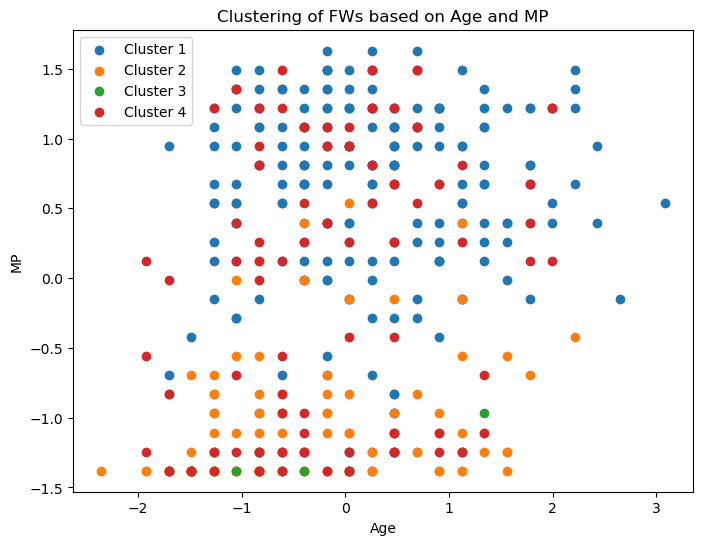

In [40]:
# using K-means clustering

# Step 4: Apply K-means Clustering
num_clusters = 4  # Choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
selected_data['Cluster'] = kmeans.fit_predict(selected_data[numerical_cols])

# Step 5: Evaluate and Visualize Clusters
# For visualization, let's use only the first two numerical features
x_feature, y_feature = numerical_cols[:2]

# Scatter plot the players with different colors for each cluster
plt.figure(figsize=(8, 6))
for cluster_num in range(num_clusters):
    cluster_data = selected_data[selected_data['Cluster'] == cluster_num]
    plt.scatter(cluster_data[x_feature], cluster_data[y_feature], label=f'Cluster {cluster_num + 1}')

plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title(f'Clustering of {selected_position}s based on {x_feature} and {y_feature}')
plt.legend()
plt.show()

# Step 6: Interpretation of Results
# Analyze and interpret the clusters based on player stats and position



In [15]:
data.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,17.7,1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,22.0,0,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,78.4,0.36,2.23,0.77,1.45,2.00,4.50,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,8.6,0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,80.8,676.0,188.1,18.5,22.0,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,60.9,1.05,1.51,0.12,1.40,0.93,3.84,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,20.0,1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,91.6,946.3,226.9,29.6,31.8,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,65.4,0.45,1.30,0.35,0.95,1.10,2.60,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,12.9,0,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,87.3,613.6,224.7,17.9,19.4,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,43.4,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,40.5,1.94,1.40,0.23,1.16,1.16,4.96,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


In [43]:
# PCA 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Select relevant columns for clustering (ignoring name and rank of players)
#selected_columns = ['MP', 'Starts', 'Min', 'Gls', 'Ast', 'PK', 'PKatt', 'CrdY', 'CrdR', 'TklW', 'Int', 'AerialsWon', 'MotM', 'Rating']

#data2 = data.drop(columns=["Player", "Rk", "Squad", "Born", "Tkl", "TklWon", 
#                           "TklDef3rd","TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDri%",
#                          "TklDriPast", "Blocks", "BlkSh", "BlkPass", "Tkl+Int", "Clr", "Err", "OG", 
#                          ]) 



# Preprocess the data
X = data[numerical_cols]

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Perform feature scaling using StandardScaler
numerical_cols = selected_data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
#selected_data[numerical_cols] = scaler.fit_transform(selected_data[numerical_cols])
X_scaled = scaler.fit_transform(selected_data[numerical_cols])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply k-means clustering with 3 clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add the cluster labels to the original DataFrame
data['Cluster'] = clusters

# Visualize the clusters in 2D using scatter plot
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], label=f'Cluster {i+1}', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', color='red', s=200, label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Football Player Stats')
plt.legend()
plt.show()


ValueError: Length of values (409) does not match length of index (2689)

In [48]:
##### PCA #####


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Read the data from the CSV file
data2 = pd.read_csv("C:/Users/User/Desktop/STQD6024 MLL/ML assignment 4/2022-2023 Football Player Stats.csv", encoding = "latin-1", sep=";")


# Select relevant columns for clustering (ignoring name and rank of players)
selected_data2 = data.drop(columns=["Nation", "Pos", "Comp", "Player", "Rk", "Squad", "Born", "Tkl", "TklWon", 
                           "TklDef3rd","TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDri%",
                          "TklDriPast", "Blocks", "BlkSh", "BlkPass", "Tkl+Int", "Clr", "Err", "OG", 
                          ]) 

selected_data2 = selected_data2.dropna()  # Remove rows with missing values
selected_data2

,Age,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Int,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,Recov,AerWon,AerLost,AerWon%
0,22,20,19,1596,17.7,1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,4.86,0.34,1.19,22.2
1,35,22,22,1980,22.0,0,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.00,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,6.64,2.18,1.23,64.0
2,23,14,8,770,8.6,0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,80.8,676.0,188.1,18.5,22.0,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.93,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,8.14,0.93,1.05,47.1
3,22,20,20,1799,20.0,1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,91.6,946.3,226.9,29.6,31.8,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.10,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.0,6.60,0.50,0.50,50.0
4,30,15,15,1165,12.9,0,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,87.3,613.6,224.7,17.9,19.4,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,43.4,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,1.16,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,0.23,2.02,0.0,0.0,6.51,0.31,0.39,44.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684,25,2,0,32,0.4,0,5.00,2.50,50.0,0.00,0.00,15.2,0.00,0.0,0.0,42.5,47.5,89.5,745.0,52.5,15.0,17.5,85.7,17.50,17.50,100.0,5.00,5.00,100.0,2.50,2.50,2.50,2.50,0.00,2.50,47.5,47.5,0.00,0.00,0.00,0.00,2.50,0.00,0.00,0.00,0.00,0.00,42.5,0.00,2.50,5.00,5.00,0.00,0.00,0.00,0.00,0.00,2.50,2.50,0.0,0.0,0.00,0.0,0.00,0.00,62.5,0.00,2.50,20.0,40.00,7.50,62.5,2.50,0.00,0.0,2.50,100.0,40.0,287.5,150.0,

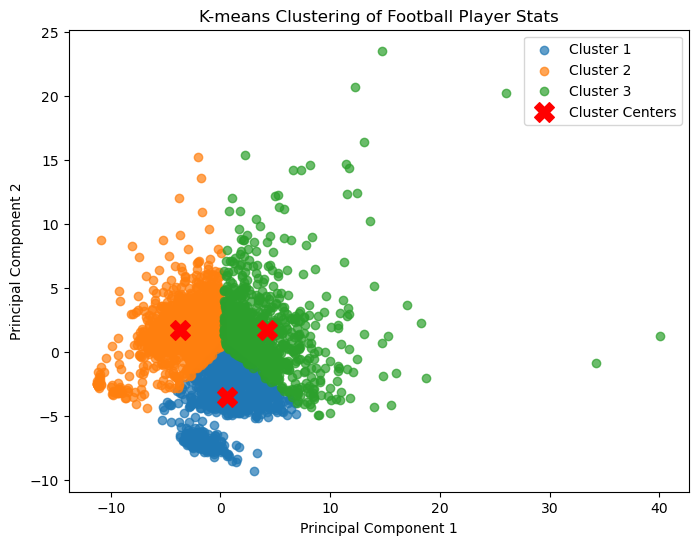

In [50]:

# Preprocess the data
numerical_cols = selected_data2.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
selected_data2[numerical_cols] = scaler.fit_transform(selected_data2[numerical_cols])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(selected_data2)

# Apply k-means clustering with 3 clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add the cluster labels to the original DataFrame
data['Cluster'] = clusters

# Visualize the clusters in 2D using scatter plot
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], label=f'Cluster {i+1}', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', color='red', s=200, label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Football Player Stats')
plt.legend()
plt.show()


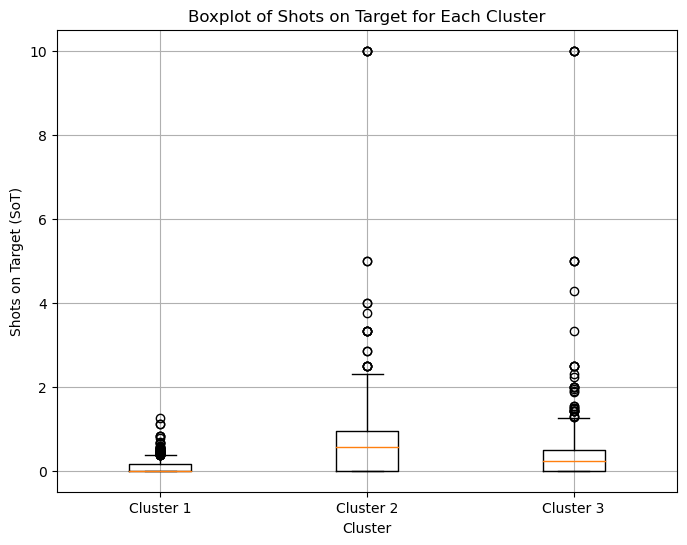

In [53]:
### boxplot ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Preprocess the data and perform PCA and K-means clustering as shown in your previous code

# Extract the 'Sot' column from the original data and add the 'Cluster' column to it
sot_data = data[['SoT', 'Cluster']]

# Create a list to store data for each cluster
cluster_data = []

# Loop through each cluster and extract 'Sot' values for that cluster
for cluster_id in range(n_clusters):
    cluster_sot = sot_data[sot_data['Cluster'] == cluster_id]['SoT'].values
    cluster_data.append(cluster_sot)

# Create the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(cluster_data, labels=[f'Cluster {i+1}' for i in range(n_clusters)])
plt.xlabel('Cluster')
plt.ylabel('Shots on Target (SoT)')
plt.title('Boxplot of Shots on Target for Each Cluster')
plt.grid(True)
plt.show()


Cluster 1 Summary:
Median: 0.0
Q1 (25th percentile): 0.0
Q3 (75th percentile): 28.6
Whisker Min: 0.0
Whisker Max: 0.0
Outliers: [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.  75. 100.
 100. 100. 100. 100.]

Cluster 2 Summary:
Median: 32.05
Q1 (25th percentile): 0.0
Q3 (75th percentile): 44.375
Whisker Min: 28.6
Whisker Max: 66.7
Outliers: []

Cluster 3 Summary:
Median: 25.0
Q1 (25th percentile): 0.0
Q3 (75th percentile): 38.55
Whisker Min: 0.0
Whisker Max: 0.0
Outliers: [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]



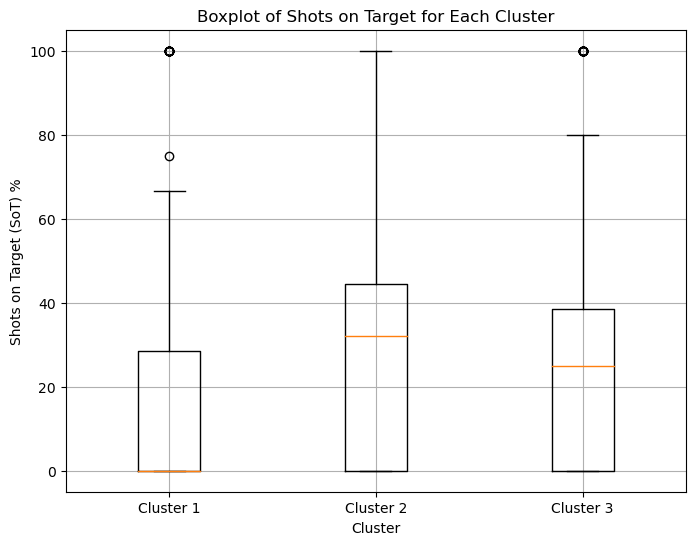

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Preprocess the data and perform PCA and K-means clustering as shown in your previous code

# Extract the 'Sot' column from the original data and add the 'Cluster' column to it
sot_data = data[['SoT%', 'Cluster']]

# Create a list to store data for each cluster
cluster_data = []

# Loop through each cluster and extract 'Sot' values for that cluster
for cluster_id in range(n_clusters):
    cluster_sot = sot_data[sot_data['Cluster'] == cluster_id]['SoT%'].values
    cluster_data.append(cluster_sot)

# Create the boxplot and get the summary statistics as a dictionary
plt.figure(figsize=(8, 6))
boxplot_dict = plt.boxplot(cluster_data, labels=[f'Cluster {i+1}' for i in range(n_clusters)])
plt.xlabel('Cluster')
plt.ylabel('Shots on Target (SoT) %')
plt.title('Boxplot of Shots on Target for Each Cluster')
plt.grid(True)

# Extract the summary statistics from the dictionary
summary_stats = {
    'medians': [line.get_ydata()[0] for line in boxplot_dict['medians']],
    'q1': [item.get_ydata()[1] for item in boxplot_dict['boxes']],
    'q3': [item.get_ydata()[2] for item in boxplot_dict['boxes']],
    'whiskers_min': [item.get_ydata()[0] for item in boxplot_dict['whiskers']],
    'whiskers_max': [item.get_ydata()[1] for item in boxplot_dict['whiskers']],
    'fliers': [item.get_ydata() for item in boxplot_dict['fliers']]
}

# Print the summary statistics for each cluster
for cluster_id in range(n_clusters):
    print(f"Cluster {cluster_id+1} Summary:")
    print(f"Median: {summary_stats['medians'][cluster_id]}")
    print(f"Q1 (25th percentile): {summary_stats['q1'][cluster_id]}")
    print(f"Q3 (75th percentile): {summary_stats['q3'][cluster_id]}")
    print(f"Whisker Min: {summary_stats['whiskers_min'][cluster_id]}")
    print(f"Whisker Max: {summary_stats['whiskers_max'][cluster_id]}")
    print(f"Outliers: {summary_stats['fliers'][cluster_id]}")
    print()

plt.show()


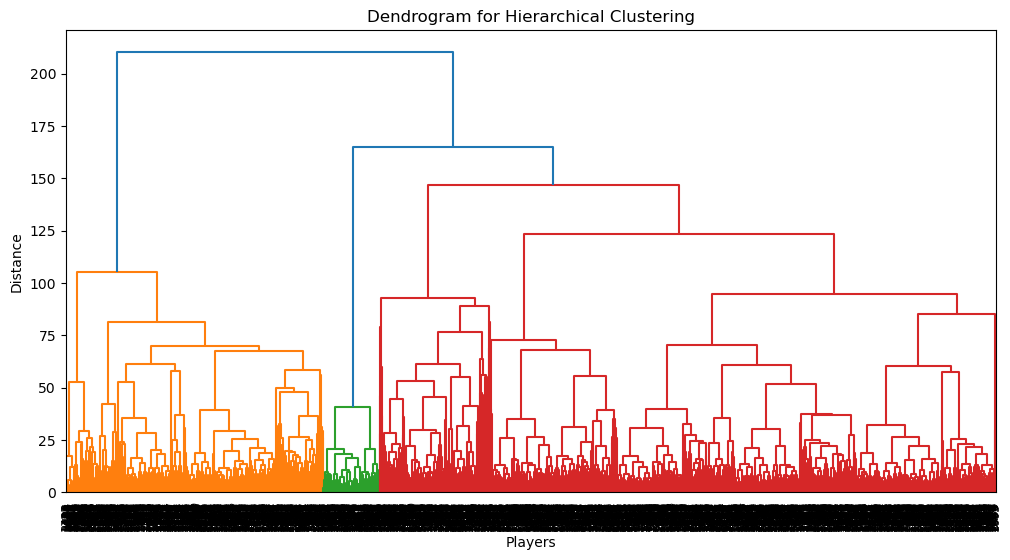

In [45]:
##### HIERARCHICAL CLUSTERING #####

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Load the dataset
data 

# Step 2: Preprocess the data
# Remove irrelevant columns and select relevant features for clustering
selected_data = data.drop(columns=["Player", "Rk", "Squad", "Born", "Tkl", "TklWon", 
                           "TklDef3rd","TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDri%",
                          "TklDriPast", "Blocks", "BlkSh", "BlkPass", "Tkl+Int", "Clr", "Err", "OG", 
                          ]) 

selected_data = selected_data.dropna()  # Remove rows with missing values

# Step 3: Feature Scaling
# Select numerical columns using select_dtypes
numerical_cols = selected_data.select_dtypes(include=['int64', 'float64']).columns

# Perform feature scaling using StandardScaler
scaler = StandardScaler()
selected_data[numerical_cols] = scaler.fit_transform(selected_data[numerical_cols])

# Step 4: Hierarchical Clustering
# Perform hierarchical clustering using Ward linkage method
Z = linkage(selected_data[numerical_cols], method='ward')

# Step 5: Visualization
# Plot the dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=selected_data.index, orientation='top', leaf_font_size=8)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Players')
plt.ylabel('Distance')
plt.show()
